<a href="https://colab.research.google.com/github/chaseScallons/Regression-Analysis/blob/main/PyTorch_RegressionANN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg') 

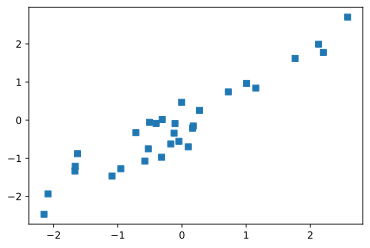

In [ ]:
# Creating data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

# Plotting Data
plt.plot(x, y, 's')
plt.show()

In [ ]:
ANN_regression = nn.Sequential(
    nn.Linear(1, 1), # Input layer --> Receives 1 input; exports 1 output
    nn.ReLU(),       # Activation Function --> Output is passed through ReLU
    nn.Linear(1, 1)  # Output layer --> --> Receives output, exports prediction
)

ANN_regression

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Learning rate
learning_rate = 0.05

# Loss function
loss_function = nn.MSELoss() # Mean Squared Error loss

# Optimizer
optimizer = torch.optim.SGD(ANN_regression.parameters(), lr = learning_rate) # Stochtastic Gradient Descent Optimizer

In [ ]:
# Training the model
epochs = 500
losses = torch.zeros(epochs)

for epoch in range(epochs):
  yHat = ANN_regression(x)      # Forward pass --> Pass data into model; yHat = model prediction

  loss = loss_function(yHat, y) # Compute loss
  losses[epoch] = loss

  optimizer.zero_grad()         # Backpropagation --> SGD
  loss.backward()
  optimizer.step()

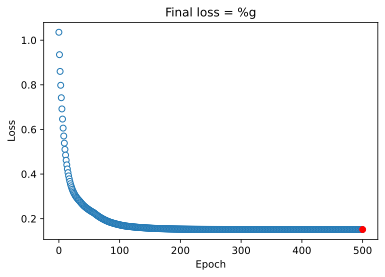

In [ ]:
# Final forward pass
predictions = ANN_regression(x)

# Final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = 0.1)
plt.plot(epochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g')
plt.show()

In [ ]:
testloss

tensor(0.1512, grad_fn=<MeanBackward0>)

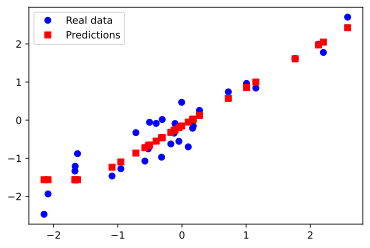

In [ ]:
# Plot data
plt.plot(x, y, 'bo', label = 'Real data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
#plt.title(f'prediction-data r={np.corrcoef(y.T, predictions.detach().T[0, 1]:.2f}')
plt.legend()
plt.show()